![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [4]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [8]:
# Celda 1.1
bikes.groupby('season').total.describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


<b>Rta:/</b> Puede observarse que el número de alquileres promedio es mayor durante primavera y verano, lo que indica existe una correlación del uso del servicio y las condiciones climáticas, ya que en otoño e invierno suelen existir condiciones meteorológicas que dificultan el transporte por este medio. También vale la pena destacar que el día con mayor uso de servicios ocurrió en otoño, por lo que debe revisarse si se puede considerar un <c>outlier</c> en la toma de datos

In [9]:
# Celda 1.2
bikes.groupby('hour').total.describe()

,count,mean,std,min,25%,50%,75%,max
hour,,,,,,,,
0,455.0,55.138462,43.620012,2.0,24.00,41.0,74.50,283.0
1,454.0,33.859031,34.112105,1.0,11.00,19.0,46.00,168.0
2,448.0,22.899554,26.110267,1.0,5.00,11.0,32.00,119.0
3,433.0,11.757506,12.666442,1.0,3.00,6.0,15.00,66.0
4,442.0,6.407240,4.217633,1.0,3.00,6.0,9.00,28.0
5,452.0,19.767699,12.784293,1.0,8.00,19.0,29.00,57.0
6,455.0,76.259341,54.745333,1.0,24.50,75.0,118.00,213.0
7,455.0,213.116484,159.207044,1.0,63.00,208.0,334.00,596.0
8,455.0,362.769231,231.723065,8.0,133.50,392.0,563.50,839.0


<b>Rta:/</b> Puede observarse que el número de alquileres promedio es mayor durante la franja de 8 a 9 am, así como de 5 a 7 pm, lo cual puede verse asociado a los horarios de entrada y salida laboral y estudiantil de las personas que hacen uso del alquiler de bicicletas. La franja de 11 pm a 6 pm es la que presenta el menor número de alquileres en promedio, por lo que puede considerarse estratégica al momento de planeación de actividades

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<AxesSubplot:xlabel='hour'>

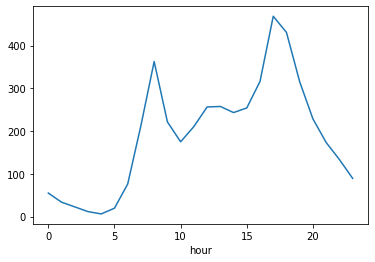

In [7]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<AxesSubplot:xlabel='hour'>

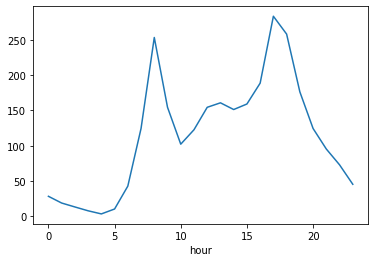

In [15]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
bikes[bikes.season==1].groupby('hour').total.mean().plot()

<b>Rta:/</b> Puede observarse que, si bien la escala de valores es inferior a la del promedio de todos los datos (Un máximo cercano a 300 durante invierno vs un máximo general cercano a 500), se conserva el mismo comportamiento estacional a lo largo del día (Las horas de maupr y menor número de alquileres son las mismas)

<AxesSubplot:xlabel='hour'>

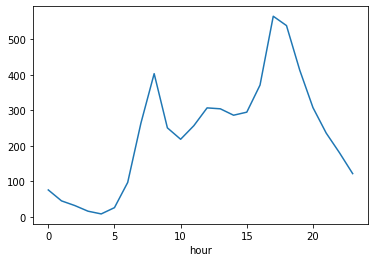

In [17]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
bikes[bikes.season==3].groupby('hour').total.mean().plot()

<b>Rta:/</b> Puede observarse que, si bien la escala de valores es inferior a la del promedio de todos los datos (Un máximo cercano a 300 durante invierno vs un máximo general cercano a 500), se conserva el mismo comportamiento estacional a lo largo del día (Las horas de mayor y menor número de alquileres son las mismas) <u>Con esto se puede concluir que no existe una interacción entre la hora del día y la estación que modifique el número promedio de alquileres</u>

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [134]:
# Celda 3
import statsmodels.api as sm

Xreg = pd.get_dummies(bikes['season'],drop_first = True)
Xreg['hour'] = bikes['hour']
Xreg = sm.add_constant(Xreg)
Yreg = bikes['total']
Xreg = Xreg.rename(columns={2: "Spring", 3: "Summer", 4: "Winter"})
model = sm.OLS(Yreg, Xreg).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     782.5
Date:                Sun, 02 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:41:28   Log-Likelihood:                -70669.
No. Observations:               10886   AIC:                         1.413e+05
Df Residuals:                   10881   BIC:                         1.414e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.4303      4.016     -1.601      0.1

<b>Rta:/</b> Puede observarse que, al ser el p-value del modelo menor a 0.05, el modelo resulta significativo, y al ser el p-value de cada variable menor a 0.05, cada variable resulta significativa para explicar el modelo. Los efectos por variable pueden explicarse de la siguiente manera:

* El número total de alquileres aumenta en 100.31 durante primavera, en 119.47 durante verano y en 84.08 durante invierno
* En invierno, el valor de alquileres no es distinto a cero (Si bien el coeficiente es negativo, analizando el p-value y el intervalo de confianza no se rechaza la hipótesis nula y por lo tanto no se puede afirmar que sea distinto a cero)
* Por cada hora que pasa, aumenta el número de alquileres en 10.54

SIn embargo, el modelo de regresión lineal presenta algunas limitaciones:

* El R2 es cercano a cero, por lo que la varianza de la respuesta explicada por el modelo es muy baja
* Si bien las horas se modelaron como una variable continua, debe tenerse en cuenta que existen en un rango [0,24], y el modelo no permite crear dichas limitaciones mediante el uso de OLS
* El estadístico DW señala que existen problemas de autocorrelación

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [258]:
from sklearn.model_selection import train_test_split
XTree = Xreg.drop(columns = 'const')
X_train, X_test, y_train, y_test = train_test_split(XTree, Yreg, random_state=1)

# Celda 4

def MSE_grupo(y):
    if y.shape[0] == 0:
        return 0
    else:
        return np.average(np.square(y-y.mean()))
    
def MSE_particion(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    MSE_l = MSE_grupo(y_l)
    MSE_r = MSE_grupo(y_r)
    
    MSE_Particion = (MSE_l+MSE_r)/2
    
    return MSE_Particion

def best_split_Regression(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, MSE_grupo(y)]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = MSE_particion(X.iloc[:, j], y, split)
                        
            if gain < best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

def tree_grow_reg(X, y, level=0, max_depth=3):
    
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], level=level, split=-1, n_samples=1, MSE = MSE_grupo(y))
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split_Regression(X, y, 10)
    
    # Guardar el árbol y estimar la predicción
    y_pred = y.mean() 
    
    tree = dict(y_pred=y_pred, level=level, split=-1, n_samples=X.shape[0], MSE = MSE_grupo(y))
    # Revisar el criterio de parada 
   
    if level >= max_depth:
        return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]
    
    tree['sl'] = tree_grow_reg(X_l, y_l, level + 1, max_depth=max_depth)
    tree['sr'] = tree_grow_reg(X_r, y_r, level + 1, max_depth=max_depth)
    
    return tree

In [223]:
arbol_manual = tree_grow_reg(X_train, y_train, level=0)
arbol_manual

{'y_pred': 189.81271435570798,
 'level': 0,
 'split': [3, 6.0],
 'n_samples': 8164,
 'MSE': 32396.58729057446,
 'sl': {'y_pred': 25.373470386686247,
  'level': 1,
  'split': [3, 5.0],
  'n_samples': 2043,
  'MSE': 965.3979648041891,
  'sl': {'y_pred': 26.430760164997054,
   'level': 2,
   'split': [3, 4.0],
   'n_samples': 1697,
   'MSE': 1122.2239919383542,
   'sl': {'y_pred': 31.71662938105891,
    'level': 3,
    'split': -1,
    'n_samples': 1341,
    'MSE': 1282.0703349476528},
   'sr': {'y_pred': 6.519662921348314,
    'level': 3,
    'split': -1,
    'n_samples': 356,
    'MSE': 18.406916740310567}},
  'sr': {'y_pred': 20.1878612716763,
   'level': 2,
   'split': [0, 1.0],
   'n_samples': 346,
   'MSE': 163.8519913795984,
   'sl': {'y_pred': 19.8,
    'level': 3,
    'split': -1,
    'n_samples': 260,
    'MSE': 182.22923076923075},
   'sr': {'y_pred': 21.36046511627907,
    'level': 3,
    'split': -1,
    'n_samples': 86,
    'MSE': 106.46308815575988}}},
 'sr': {'y_pred': 244

En el árbol anterior, puede observarse la generación de 8 nodos terminales (Identificados con split=-1)

In [224]:
def tree_predict(X, tree):
    
    predicted = np.ones(X.shape[0])

    # Revisar si es el nodo final
    if tree['split'] == -1:
            predicted = y_pred
            
    else:
        
        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  # Si el nodo izquierdo está vacio solo continua con el derecho 
            predicted[~filter_l] = tree_predict(X_r, tree['sr'])
        elif X_r.shape[0] == 0:  #  Si el nodo derecho está vacio solo continua con el izquierdo
            predicted[filter_l] = tree_predict(X_l, tree['sl'])
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'])
            predicted[~filter_l] = tree_predict(X_r, tree['sr'])

    return predicted

In [228]:
result = tree_predict(X_test,arbol_manual)
MSEManual=np.average(np.square(result-y_test))
MSEManual

34063.53778461991

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [237]:
# Celda 5
max_depth_range = range(1, 15)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
MSE_scores = []

# Importación de modelos de sklearn 

from sklearn.tree import DecisionTreeRegressor


# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeRegressor de la libreria sklearn
    clf = DecisionTreeRegressor(max_depth=depth, random_state=1)
    arbol = clf.fit(X_train,y_train)
    prediccion=arbol.predict(X_test)
    MSEArbol=np.average(np.square(prediccion-y_test))
    MSE_scores.append(MSEArbol)

Text(0, 0.5, 'MSE')

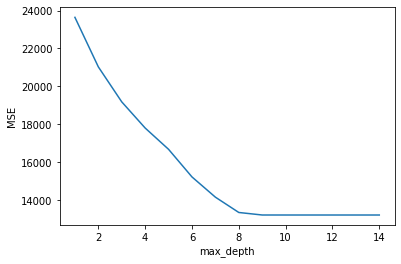

In [238]:
import matplotlib.pyplot as plt
plt.plot(max_depth_range, MSE_scores)
plt.xlabel('max_depth')
plt.ylabel('MSE')

In [248]:
print('La máxima profundidad del árbol que minimiza el MSE de test es de '+str(MSE_scores.index(min(MSE_scores))+1))

La máxima profundidad del árbol que minimiza el MSE de test es de 10


In [259]:
clf_opt = DecisionTreeRegressor(max_depth=MSE_scores.index(min(MSE_scores))+1, random_state=1)
arbol_opt = clf_opt.fit(X_train,y_train)
prediccion_opt=arbol_opt.predict(X_test)
MSEArbol_opt=np.average(np.square(prediccion_opt-y_test))
MSEArbol_opt

13225.119157558625

**Rta:/** Al comparar los dos árboles mediante la métrica del MSE, se puede observar que el árbol estimado mediante el algoritmo del paquete scikit presenta un mejor rendimiento, ya que minimiza dicho valor. También es importante señalar que el árbol del paquete alcanza un mayor número de niveles (8 vs 3 utilizados en el método manual), por lo que este es un parámetro de calibración importante a la hora de construir este modelo

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [239]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [240]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [260]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [242]:
# Celda 6
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Importación de modelos de sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

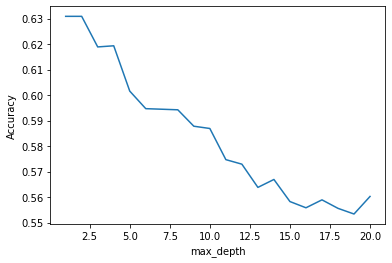

In [243]:
# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [250]:
print('La máxima profundidad del árbol que maximiza el accuracy de test es de '+str(accuracy_scores.index(max(accuracy_scores))+1))

La máxima profundidad del árbol que maximiza el accuracy de test es de 1


In [255]:
from sklearn import metrics
clf_opt = DecisionTreeClassifier(max_depth=3, random_state=1)
resultados_arbol_c = clf.fit(X_train, y_train)
predic_arbol = resultados_arbol_c.predict(X_test)
print('Accuracy árbol de decisión: '+str(metrics.accuracy_score(y_test,predic_arbol)))
print('F1-Score árbol de decisión: '+str(metrics.f1_score(y_test,predic_arbol)))

Accuracy árbol de decisión: 0.5333333333333333
F1-Score árbol de decisión: 0.5333333333333333


In [261]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=0).fit(X_train, y_train)
predic_log = log.predict(X_test)
print('Accuracy regresión logística: '+str(metrics.accuracy_score(y_test,predic_log)))
print('F1-Score regresión logística: '+str(metrics.f1_score(y_test,predic_log)))

Accuracy regresión logística: 0.6133333333333333
F1-Score regresión logística: 0.6102150537634409


**RTA/** Puede observarse que, en el caso de ambas métricas, la regresión logística presenta un desempeño superior, por lo que es el modelo recomendado a utilizar

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [281]:
# Celda 7
###Ensamble 100 árboles de decisión con máxima profundidad 7
from sklearn.ensemble import BaggingClassifier
clf_7_1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth = 7), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)
clf_7_1.fit(X_train, y_train)
y_7_1_pred = clf_7_1.predict(X_test)
print('F1 Score y Accuracy 100 árboles con max_depth = 7')
metrics.f1_score(y_7_1_pred, y_test), metrics.accuracy_score(y_7_1_pred, y_test)

F1 Score y Accuracy 100 árboles con max_depth = 7


(0.6564580559254328, 0.656)

In [282]:
###Ensamble 100 árboles de decisión con mínimo de 10 observaciones por hoja

clf_7_2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf = 10), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)
clf_7_2.fit(X_train, y_train)
y_7_2_pred = clf_7_2.predict(X_test)
print('F1 Score y Accuracy 100 árboles con min_samples_leaf = 7')
metrics.f1_score(y_7_2_pred, y_test), metrics.accuracy_score(y_7_2_pred, y_test)

F1 Score y Accuracy 100 árboles con min_samples_leaf = 7


(0.6596306068601584, 0.656)

In [283]:
clf_7_3 = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)
clf_7_3.fit(X_train, y_train)
y_7_3_pred = clf_7_3.predict(X_test)
print('F1 Score y Accuracy 100 regresiones logísticas')
metrics.f1_score(y_7_3_pred, y_test), metrics.accuracy_score(y_7_3_pred, y_test)

F1 Score y Accuracy 100 regresiones logísticas


(0.611748818365969, 0.6166666666666667)

In [288]:
####Ensamble de los 300 modelos

n_estimators = 100
np.random.seed(123)

n_samples = X_train.shape[0]
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]

np.random.seed(123) 
seeds = np.random.randint(1, 10000, size=n_estimators)

#100 árboles con max depth 7
trees_MD = {}
for i in range(n_estimators):
    trees_MD[i] = DecisionTreeClassifier(max_depth=7, random_state=seeds[i])
    trees_MD[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])
    
y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df.iloc[:, i] = trees_MD[i].predict(X_test)
    
#100 árboles con min sample leaf 10
trees_MSL = {}
for i in range(n_estimators):
    trees_MSL[i] = DecisionTreeClassifier(min_samples_leaf = 10, random_state=seeds[i])
    trees_MSL[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])
    
y_pred_df_2 = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df_2.iloc[:, i] = trees_MSL[i].predict(X_test)

#100 regresiones logísticas
trees_LR = {}
for i in range(n_estimators):
    trees_LR[i] = LogisticRegression(random_state=seeds[i])
    trees_LR[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])
    
y_pred_df_3 = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df_3.iloc[:, i] = trees_LR[i].predict(X_test)

total_mayoritaria = pd.concat([y_pred_df,y_pred_df_2,y_pred_df_3],axis =1)

y_pred_mayoritaria = (total_mayoritaria.sum(axis=1) >= ((3*n_estimators) / 2)).astype(np.int)

print('F1 Score y Accuracy Ensamble 300 modelos')
metrics.f1_score(y_pred_mayoritaria, y_test), metrics.accuracy_score(y_pred_mayoritaria, y_test)



F1 Score y Accuracy Ensamble 300 modelos


(0.6228187919463087, 0.6253333333333333)

**RTA:/**  Puede observarse que el ensamblaje heterogéneo presenta un rendimiento mejor únicamente al compararse con el ensamble homogéneo de regresión logística, pero el mejor desempeño en general lo presenta un ensamblaje homogéneo de árboles con un mínimo de 10 muestras por hoja

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [291]:
# Celda 8
### 100 árboles con max depth 7
from sklearn.ensemble import BaggingClassifier
clf_7_1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth = 7), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)
clf_7_1.fit(X_train, y_train)
y_7_1_pred = clf_7_1.predict(X_test)

errors_8_1 = np.zeros(clf_7_1.n_estimators)
y_pred_all_8_1 = np.zeros((X_test.shape[0], clf_7_1.n_estimators))

for i in range(clf_7_1.n_estimators):
    oob_sample = ~clf_7_1.estimators_samples_[i]
    y_pred_ = clf_7_1.estimators_[i].predict(X_train.values[oob_sample])
    errors_8_1[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_8_1[:, i] = clf_7_1.estimators_[i].predict(X_test)
    
alpha_8_1 = (1 - errors_8_1) / (1 - errors_8_1).sum()
y_pred_8_1 = (np.sum(y_pred_all_8_1 * alpha_8_1, axis=1) >= 0.5).astype(np.int)
print('F1 Score y Accuracy Ensamble 100 árboles con max depth 7 - ponderada')
metrics.f1_score(y_pred_8_1, y_test), metrics.accuracy_score(y_pred_8_1, y_test)

F1 Score y Accuracy Ensamble 100 árboles con max depth 7 - ponderada


(0.652377762893503, 0.654)

In [294]:
### 100 árboles con min sample leaf 10

clf_7_2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf = 10), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)
clf_7_2.fit(X_train, y_train)
y_7_2_pred = clf_7_2.predict(X_test)
print('F1 Score y Accuracy 100 árboles con min_samples_leaf = 7')
metrics.f1_score(y_7_2_pred, y_test), metrics.accuracy_score(y_7_2_pred, y_test)

errors_8_2 = np.zeros(clf_7_2.n_estimators)
y_pred_all_8_2 = np.zeros((X_test.shape[0], clf_7_2.n_estimators))

for i in range(clf_7_2.n_estimators):
    oob_sample = ~clf_7_2.estimators_samples_[i]
    y_pred_ = clf_7_2.estimators_[i].predict(X_train.values[oob_sample])
    errors_8_2[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_8_2[:, i] = clf_7_2.estimators_[i].predict(X_test)
    
alpha_8_2 = (1 - errors_8_2) / (1 - errors_8_2).sum()
y_pred_8_2 = (np.sum(y_pred_all_8_2 * alpha_8_2, axis=1) >= 0.5).astype(np.int)
print('F1 Score y Accuracy Ensamble 100 árboles con min sample leaf 10 - ponderada')
metrics.f1_score(y_pred_8_2, y_test), metrics.accuracy_score(y_pred_8_2, y_test)

F1 Score y Accuracy Ensamble 100 árboles con min sample leaf 10 - ponderada


(0.6523201075991929, 0.6553333333333333)

In [295]:
####100 regresiones logísticas

clf_7_3 = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)
clf_7_3.fit(X_train, y_train)
y_7_3_pred = clf_7_3.predict(X_test)

errors_8_3 = np.zeros(clf_7_3.n_estimators)
y_pred_all_8_3 = np.zeros((X_test.shape[0], clf_7_3.n_estimators))

for i in range(clf_7_3.n_estimators):
    oob_sample = ~clf_7_3.estimators_samples_[i]
    y_pred_ = clf_7_3.estimators_[i].predict(X_train.values[oob_sample])
    errors_8_3[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_8_3[:, i] = clf_7_3.estimators_[i].predict(X_test)
    
alpha_8_3 = (1 - errors_8_3) / (1 - errors_8_3).sum()
y_pred_8_3 = (np.sum(y_pred_all_8_3 * alpha_8_3, axis=1) >= 0.5).astype(np.int)
print('F1 Score y Accuracy Ensamble 100 regresiones logísticas - ponderada')
metrics.f1_score(y_pred_8_3, y_test), metrics.accuracy_score(y_pred_8_3, y_test)

F1 Score y Accuracy Ensamble 100 regresiones logísticas - ponderada


(0.6177658142664872, 0.6213333333333333)

In [313]:
####Ensamble de los 300 modelos

samples_oob = []
# Obtención de las observaciones fuera de la bolsa "out-of-bag" para cada muestra
for sample in samples:
    samples_oob.append(sorted(set(range(n_samples)) - set(sample)))
  

errors_1 = np.zeros(n_estimators)
errors_2 = np.zeros(n_estimators)
errors_3 = np.zeros(n_estimators)

for i in range(n_estimators):
    y_pred_md_p = trees_MD[i].predict(X_train.iloc[samples_oob[i]])
    errors_1[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred_md_p)
    y_pred_msl_p = trees_MSL[i].predict(X_train.iloc[samples_oob[i]])
    errors_2[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred_msl_p)
    y_pred_lr_p = trees_LR[i].predict(X_train.iloc[samples_oob[i]])
    errors_3[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred_lr_p)

alpha1 = (1 - errors_1) / (1 - errors_1).sum()
alpha2 = (1 - errors_2) / (1 - errors_2).sum()
alpha3 = (1 - errors_3) / (1 - errors_3).sum()

weighted_sum_1 = ((y_pred_df) * alpha1).sum(axis=1)
weighted_sum_2 = ((y_pred_df_2) * alpha2).sum(axis=1)
weighted_sum_3 = ((y_pred_df_3) * alpha3).sum(axis=1)

y_pred_pp = ((weighted_sum_1+weighted_sum_2+weighted_sum_3)/3 >= 0.5).astype(np.int)
print('F1 Score y Accuracy Ensamble 300 iteraciones - ponderada')
metrics.f1_score(y_pred_pp, y_test), metrics.accuracy_score(y_pred_pp, y_test)

F1 Score y Accuracy Ensamble 300 iteraciones - ponderada


(0.6227303295225286, 0.626)

**RTA:(/**  Al igual que en la iteración anterior, puede observarse que el ensamblaje heterogéneo presenta un rendimiento mejor únicamente al compararse con el ensamble homogéneo de regresión logística, pero el mejor desempeño en general lo presenta un ensamblaje homogéneo de árboles con un mínimo de 10 muestras por hoja

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

Comparación F1 Score


<AxesSubplot:xlabel='F1 Score', ylabel='Ensamble'>

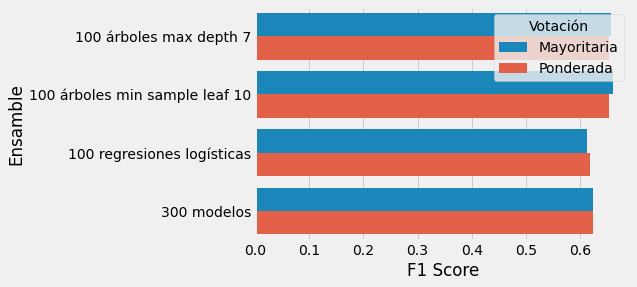

In [329]:
# Celda 9
import seaborn as sns
resultados_ensamble = pd.DataFrame()
resultados_ensamble['Votación'] = ['Mayoritaria','Mayoritaria','Mayoritaria','Mayoritaria','Ponderada','Ponderada','Ponderada','Ponderada']
resultados_ensamble['Ensamble'] = ['100 árboles max depth 7','100 árboles min sample leaf 10','100 regresiones logísticas','300 modelos','100 árboles max depth 7','100 árboles min sample leaf 10','100 regresiones logísticas','300 modelos']
resultados_ensamble['F1 Score'] = [0.65645,0.65963,0.6117,0.6228,0.6524,0.6523,0.6178,0.6227]
resultados_ensamble['Accuracy'] = [0.656,0.656,0.6167,0.6253,0.654,0.6553,0.6213,0.626]
print('Comparación F1 Score')
sns.barplot(data=resultados_ensamble, x="F1 Score", y="Ensamble", hue="Votación")


Comparación Accuracy


<AxesSubplot:xlabel='Accuracy', ylabel='Ensamble'>

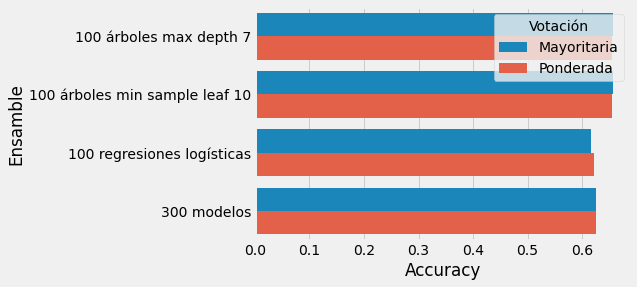

In [330]:
print('Comparación Accuracy')
sns.barplot(data=resultados_ensamble, x="Accuracy", y="Ensamble", hue="Votación")

Puede concluirse que, con excepción de la regresión logística, suele presentar un mejor rendimiento para este conjunto de datos una votación mayoritaria que una votación ponderada. Además el mejor desempeño lo suelen tener los ensamblajes homogéneos basados en árboles que los ensamblajes heterogéneos, sin embargo hay que resaltar que la técnica adecuada para ensamblajes heterogéneos es el stacking, por lo que debe realizarse dicha iteración con el fin de optimizar los resaltados. Cabe destacar que para realizar el bagging heterogéneo al final, al momento de promediar los pesos entre las distintas metodologías, se recurre a un promedio simple, por lo que habría que realizarse cómo realizar una ponderación que no solo tenga en cuenta los términos OOB, sino también un peso particular por modelo seleccionado